<!-- 2025/08/13 début du travail sur cet exercice -->

# Analyse du risque de défaillance des joints toriques de la navette Challenger

Le 27 Janvier 1986, veille du décollage de la navette *Challenger*, eu
lieu une télé-conférence de trois heures entre les ingénieurs de la
Morton Thiokol (constructeur d'un des moteurs) et de la NASA. La
discussion portait principalement sur les conséquences de la
température prévue au moment du décollage de 31°F (juste en dessous de
0°C) sur le succès du vol et en particulier sur la performance des
joints toriques utilisés dans les moteurs. En effet, aucun test
n'avait été effectué à cette température.

L'étude qui suit reprend donc une partie des analyses effectuées cette
nuit là et dont l'objectif était d'évaluer l'influence potentielle de
la température et de la pression à laquelle sont soumis les joints
toriques sur leur probabilité de dysfonctionnement. Pour cela, nous
disposons des résultats des expériences réalisées par les ingénieurs
de la NASA durant les 6 années précédant le lancement de la navette
Challenger.



## Chargement des données
Nous commençons donc par charger ces données:

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("shuttle.csv")
data

Date  Count  Temperature  Pressure  Malfunction
0    4/12/81      6           66        50            0
1   11/12/81      6           70        50            1
2    3/22/82      6           69        50            0
3   11/11/82      6           68        50            0
4    4/04/83      6           67        50            0
5    6/18/82      6           72        50            0
6    8/30/83      6           73       100            0
7   11/28/83      6           70       100            0
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
11  10/05/84      6           78       200            0
12  11/08/84      6           67       200            0
13   1/24/85      6           53       200            2
14   4/12/85      6           67       200            0
15   4/29/85      6           75       200            0
16   6/17/85      6           70       200            0
17   7/29/85      6           81       200            0
18   8/27/85      6           76       200            0
19  10/03/85      6           79       200            0
20  10/30/85      6           75       200            2
21  11/26/85      6           76       200            0
22   1/12/86      6           58       200            1

Le jeu de données nous indique la date de l'essai, le nombre de joints
toriques mesurés (il y en a 6 sur le lançeur principal), la
température (en Farenheit) et la pression (en psi), et enfin le
nombre de dysfonctionnements relevés. 

## Inspection graphique des données
Les vols où aucun incident n'est relevé n'apportant aucun information
sur l'influence de la température ou de la pression sur les
dysfonctionnements, nous nous concentrons sur les expériences où au
moins un joint a été défectueux.


In [2]:
#data = data[data.Malfunction>0] 
data2 = data[data.Temperature <= 65]
data2

Date  Count  Temperature  Pressure  Malfunction
8   2/03/84      6           57       200            1
9   4/06/84      6           63       200            1
13  1/24/85      6           53       200            2
22  1/12/86      6           58       200            1

Très bien, nous avons une variabilité de température importante mais
la pression est quasiment toujours égale à 200, ce qui devrait
simplifier l'analyse.

Comment la fréquence d'échecs varie-t-elle avec la température ?


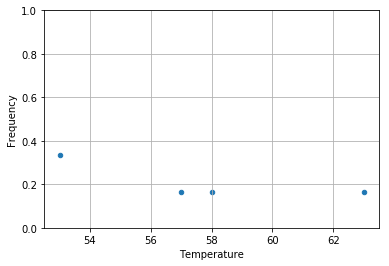

In [3]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data2["Frequency"]=data2.Malfunction/data2.Count
data2.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

À première vue, ce n'est pas flagrant mais bon, essayons quand même
d'estimer l'impact de la température $t$ sur la probabilité de
dysfonctionnements d'un joint. 


## Estimation de l'influence de la température

Supposons que chacun des 6 joints toriques est endommagé avec la même
probabilité et indépendamment des autres et que cette probabilité ne
dépend que de la température. Si on note $p(t)$ cette probabilité, le
nombre de joints $D$ dysfonctionnant lorsque l'on effectue le vol à
température $t$ suit une loi binomiale de paramètre $n=6$ et
$p=p(t)$. Pour relier $p(t)$ à $t$, on va donc effectuer une
régression logistique.

In [4]:
import statsmodels.api as sm

data2["Success"]=data2.Count-data2.Malfunction
data2["Intercept"]=1

logmodel=sm.GLM(data2['Frequency'], data2[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                    4
Model:                            GLM   Df Residuals:                        2
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1.3845
Date:                Wed, 13 Aug 2025   Deviance:                     0.040847
Time:                        16:05:21   Pearson chi2:                   0.0407
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.3201     20.789      0.208      0.835     -36.425      45.066
Temperature    -0.0985      0.364     -0.271      0.787      -0.812       0.615
===============================================================================
"""

L'estimateur le plus probable du paramètre de température est 0.0014
et l'erreur standard de cet estimateur est de 0.122, autrement dit on
ne peut pas distinguer d'impact particulier et il faut prendre nos
estimations avec des pincettes.


## Estimation de la probabilité de dysfonctionnant des joints toriques
La température prévue le jour du décollage est de 31°F. Essayons
d'estimer la probabilité de dysfonctionnement des joints toriques à
cette température à partir du modèle que nous venons de construire:


In [6]:
data2

Date  Count  Temperature  Pressure  Malfunction  Frequency  Success  \
8   2/03/84      6           57       200            1   0.166667        5   
9   4/06/84      6           63       200            1   0.166667        5   
13  1/24/85      6           53       200            2   0.333333        4   
22  1/12/86      6           58       200            1   0.166667        5   

    Intercept  
8           1  
9           1  
13          1  
22          1

KeyError: 'Frequency'

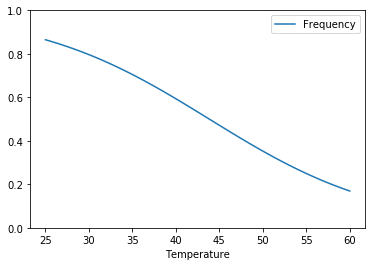

In [10]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=25, stop=60, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept','Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

In [8]:
data_pred


Intercept  Temperature  Frequency
0            1    30.000000   0.796399
1            1    30.333333   0.791021
2            1    30.666667   0.785539
3            1    31.000000   0.779954
4            1    31.333333   0.774265
5            1    31.666667   0.768472
6            1    32.000000   0.762576
7            1    32.333333   0.756578
8            1    32.666667   0.750478
9            1    33.000000   0.744277
10           1    33.333333   0.737975
11           1    33.666667   0.731574
12           1    34.000000   0.725075
13           1    34.333333   0.718479
14           1    34.666667   0.711788
15           1    35.000000   0.705003
16           1    35.333333   0.698126
17           1    35.666667   0.691159
18           1    36.000000   0.684104
19           1    36.333333   0.676963
20           1    36.666667   0.669738
21           1    37.000000   0.662433
22           1    37.333333   0.655049
23           1    37.666667   0.647590
24           1    38.000000   0.640058
25           1    38.333333   0.632456
26           1    38.666667   0.624788
27           1    39.000000   0.617057
28           1    39.333333   0.609266
29           1    39.666667   0.601419
..         ...          ...        ...
91           1    60.333333   0.164500
92           1    60.666667   0.160035
93           1    61.000000   0.155669
94           1    61.333333   0.151400
95           1    61.666667   0.147228
96           1    62.000000   0.143152
97           1    62.333333   0.139170
98           1    62.666667   0.135281
99           1    63.000000   0.131485
100          1    63.333333   0.127779
101          1    63.666667   0.124163
102          1    64.000000   0.120635
103          1    64.333333   0.117193
104          1    64.666667   0.113838
105          1    65.000000   0.110566
106          1    65.333333   0.107377
107          1    65.666667   0.104269
108          1    66.000000   0.101241
109          1    66.333333   0.098291
110          1    66.666667   0.095418
111          1    67.000000   0.092620
112          1    67.333333   0.089896
113          1    67.666667   0.087245
114          1    68.000000   0.084664
115          1    68.333333   0.082153
116          1    68.666667   0.079710
117          1    69.000000   0.077334
118          1    69.333333   0.075022
119          1    69.666667   0.072775
120          1    70.000000   0.070589

[121 rows x 3 columns]

Comme on pouvait s'attendre au vu des données initiales, la
température n'a pas d'impact notable sur la probabilité d'échec des
joints toriques. Elle sera d'environ 0.2, comme dans les essais
précédents où nous il y a eu défaillance d'au moins un joint. Revenons
à l'ensemble des données initiales pour estimer la probabilité de
défaillance d'un joint:


In [11]:
data = pd.read_csv("shuttle.csv")
print(np.sum(data.Malfunction)/np.sum(data.Count))

0.06521739130434782


Cette probabilité est donc d'environ $p=0.065$, sachant qu'il existe
un joint primaire un joint secondaire sur chacune des trois parties du
lançeur, la probabilité de défaillance des deux joints d'un lançeur
est de $p^2 \approx 0.00425$. La probabilité de défaillance d'un des
lançeur est donc de $1-(1-p^2)^3 \approx 1.2%$.  Ça serait vraiment
pas de chance... Tout est sous contrôle, le décollage peut donc avoir
lieu demain comme prévu.

Seulement, le lendemain, la navette Challenger explosera et emportera
avec elle ses sept membres d'équipages. L'opinion publique est
fortement touchée et lors de l'enquête qui suivra, la fiabilité des
joints toriques sera directement mise en cause. Au delà des problèmes
de communication interne à la NASA qui sont pour beaucoup dans ce
fiasco, l'analyse précédente comporte (au moins) un petit
problème... Saurez-vous le trouver ? Vous êtes libre de modifier cette
analyse et de regarder ce jeu de données sous tous les angles afin
d'expliquer ce qui ne va pas.